In [1]:
import pandas as pd
import os
import glob
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
for csv in glob.glob('*.csv'):
    tmp = pd.read_csv(csv)
    df = df.append(tmp)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H%M%SZ')
df

,issuer,serial,reason,date
0,"Cloudflare, Inc.",0BDF08B0539C761C4A086C04B087EA57,None,2020-09-22 16:04:34
1,"Cloudflare, Inc.",0C2E117FF30ABDE5D24682E5D36975B1,None,2021-01-26 09:58:23
2,"Cloudflare, Inc.",0D8039C121686F1603EB8E1FC83AC107,None,2021-01-26 10:04:08
0,Google Trust Services,2684BAC8185465C20800000000715402,None,2021-05-05 08:20:48
1,Google Trust Services,929AE634982BBB7F0800000000715405,None,2021-05-05 08:20:49
...,...,...,...,...
26358,Amazon,06A54491A529528A6453E89D607E478C,None,2021-05-11 20:11:27
26359,Amazon,0665AAEE4C39A2BC178706AB3AAA4E58,None,2021-05-11 20:21:36
26360,Amazon,07A276A55FFC945D7FF39863D09D2B82,None,2021-05-11 20:31:29
26361,Amazon,0A509613F0DF41F5812A27D9CD3C172F,None,2021-05-11 20:41:34


In [3]:
issuer_df = df.groupby(['issuer'])
start = issuer_df['date'].min()
end = issuer_df['date'].max()
range_df = pd.concat({'start date': start, 'end date': end}, axis=1)
range_df['date range'] = end - start
range_df['count'] = issuer_df.size()

DAY_LENGTH = 86400
range_df['count per day'] = range_df['count'] / \
    range_df['date range'].dt.total_seconds() * DAY_LENGTH
range_df

,start date,end date,date range,count,count per day
issuer,,,,,
Amazon,2020-04-05 00:01:48,2021-05-11 20:51:32,401 days 20:49:44,26363,65.601164
"Cloudflare, Inc.",2020-09-22 16:04:34,2021-01-26 10:04:08,125 days 17:59:34,3,0.023857
GlobalSign,2014-11-25 00:00:00,2019-09-30 00:00:00,1770 days 00:00:00,22,0.012429
"GoDaddy.com, Inc.",2011-09-09 16:23:07,2019-03-20 16:15:34,2748 days 23:52:27,7044,2.562391
Google Trust Services,2021-05-05 08:20:48,2021-05-11 19:47:04,6 days 11:26:16,16,2.470442


In [4]:
df.groupby(['issuer', 'reason']).size()

issuer                 reason                
Amazon                 None                      26363
Cloudflare, Inc.       None                          3
GlobalSign             Cessation Of Operation       22
GoDaddy.com, Inc.      Affiliation Changed         115
                       Cessation Of Operation     6750
                       Key Compromise               11
                       Privilege Withdrawn         113
                       Superseded                   55
Google Trust Services  None                         16
dtype: int64

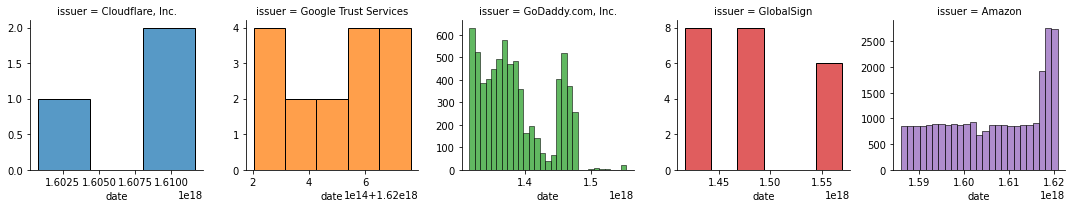

In [5]:
hist_df = df.copy()
hist_df['date'] = pd.to_numeric(hist_df['date'])
g = sns.FacetGrid(
    hist_df,
    col='issuer',
    hue='issuer',
    sharex=False,
    sharey=False
)
fig = g.map(sns.histplot, 'date')
fig.savefig('revocation-dates-histogram.pdf')
#sns.displot(hist_df, x='date', row='issuer', hue='issuer')

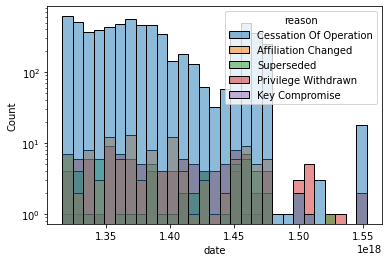

In [6]:
go_daddy_mask = hist_df['issuer'] == 'GoDaddy.com, Inc.'
ax = sns.histplot(hist_df[go_daddy_mask], x='date', hue='reason', log_scale=[False,True])
ax.figure.savefig('revocation-reasons-histogram-godaddy.pdf')